**HEART FAILURE PREDICTION DATASET** 

Context:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Attribute Information:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]



**IMPORTING LIBRARIES**

In [1059]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [1060]:
df=pd.read_csv("Heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [1061]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [1062]:
df.shape

(918, 12)

In [1063]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**EXPLORATORY DATA ANALYSIS**

In [1065]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [1066]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [1067]:
df.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [1068]:
df.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [1069]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [1070]:
df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [1071]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [1072]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [1073]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**UNIVARIATE ANALYSIS**

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

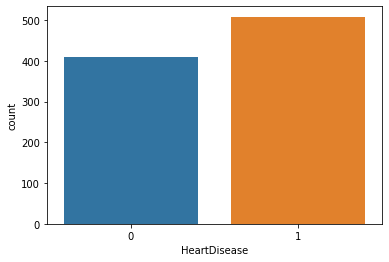

In [1074]:
sb.countplot(x=df.HeartDisease)

<AxesSubplot:xlabel='Sex', ylabel='count'>

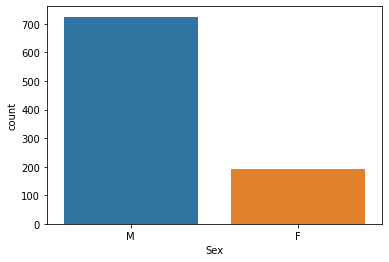

In [1075]:
sb.countplot(x=df.Sex)

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

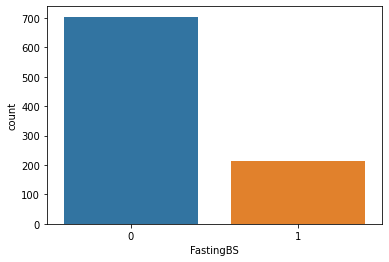

In [1076]:
sb.countplot(x=df.FastingBS)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

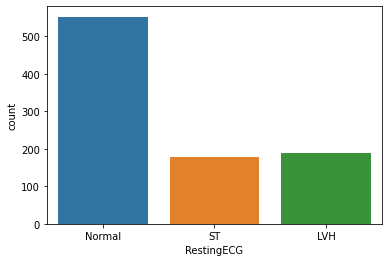

In [1077]:
sb.countplot(x=df.RestingECG)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

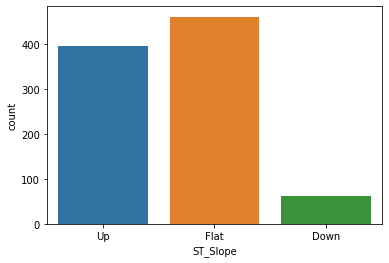

In [1078]:
sb.countplot(x=df.ST_Slope)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

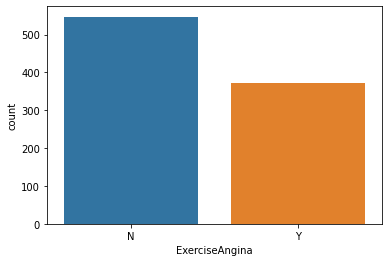

In [1079]:
sb.countplot(x=df.ExerciseAngina)

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

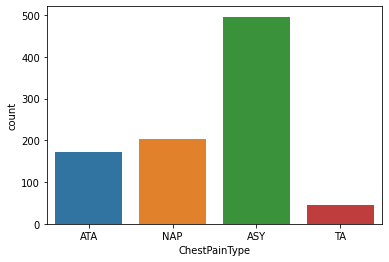

In [1080]:
sb.countplot(x=df.ChestPainType)

In [1081]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:xlabel='Age', ylabel='Density'>

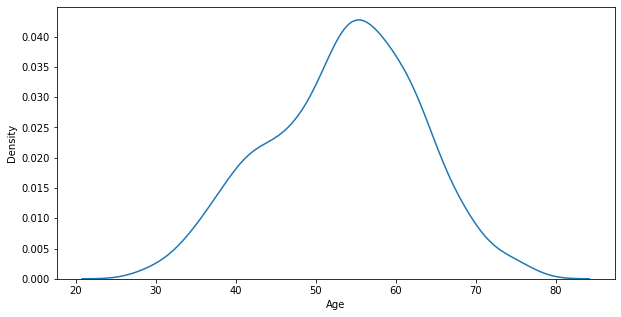

In [1082]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.Age)

<AxesSubplot:xlabel='RestingBP', ylabel='Density'>

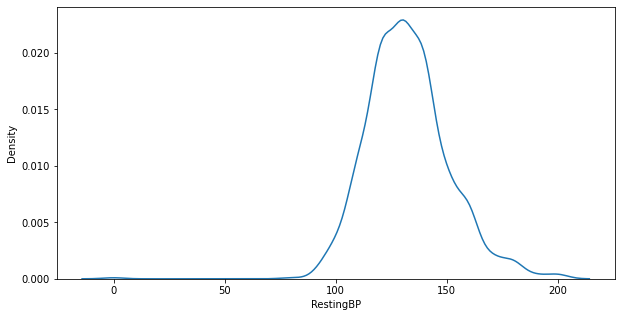

In [1083]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.RestingBP)

<AxesSubplot:xlabel='Cholesterol', ylabel='Density'>

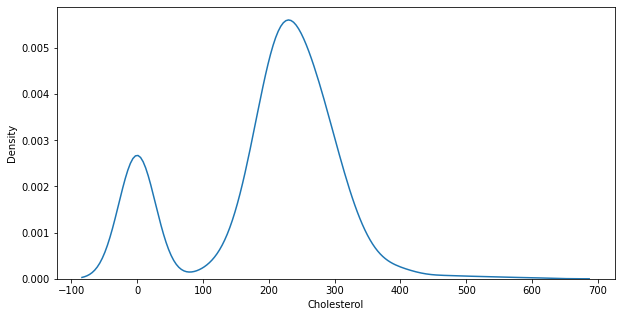

In [1084]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.Cholesterol)

<AxesSubplot:xlabel='FastingBS', ylabel='Density'>

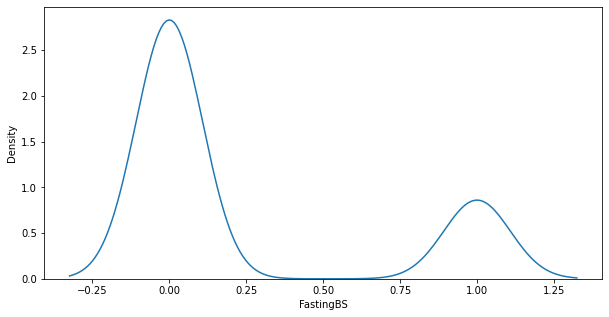

In [1085]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.FastingBS)

<AxesSubplot:xlabel='MaxHR', ylabel='Density'>

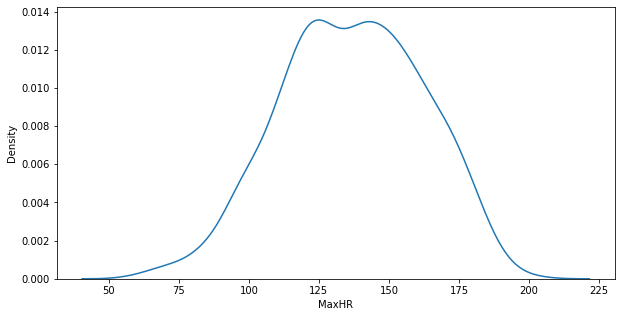

In [1086]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.MaxHR)

<AxesSubplot:xlabel='Oldpeak', ylabel='Density'>

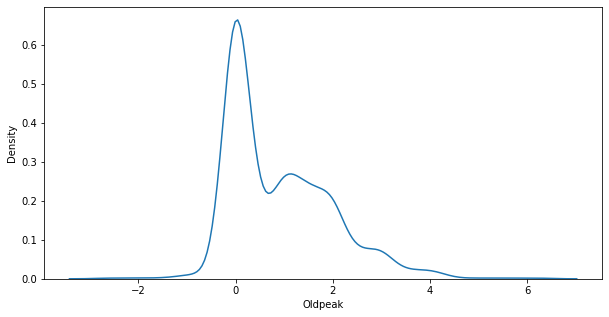

In [1087]:
plt.figure(figsize=(10,5))
sb.kdeplot(x=df.Oldpeak)

**OUTLIERS**

<AxesSubplot:>

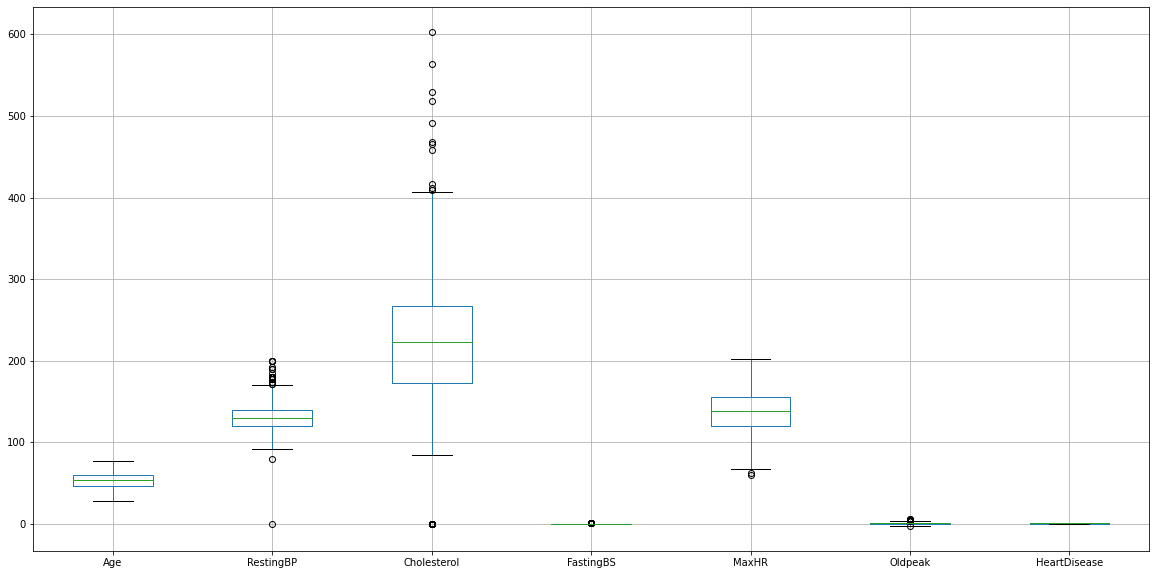

In [1088]:
plt.figure(figsize=(20,10))
df.boxplot()

**Outliers for RestingBP**

In [1089]:

df=df.drop(df[df['RestingBP']==0].index)

In [1090]:
df.shape

(917, 12)

In [1091]:
q1 = df['RestingBP'].quantile(0.25)
q3 = df['RestingBP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['RestingBP'] > Upper_tail) | (df['RestingBP'] < Lower_tail)] 
u = pd.DataFrame(u)
print('Outliers on RestingBP:')
u.value_counts(df.HeartDisease)

Outliers on RestingBP:


HeartDisease
1    17
0    10
dtype: int64

In [1092]:
df.RestingBP=np.where(df.RestingBP>Upper_tail,df.RestingBP.median(),df.RestingBP)
df.RestingBP=np.where(df.RestingBP<Lower_tail,df.RestingBP.median(),df.RestingBP)

In [1093]:
q1 = df.Cholesterol.quantile(0.25)
q3 = df.Cholesterol.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
df.Cholesterol=np.where(df.Cholesterol>Upper_tail,df.Cholesterol.median(),df.Cholesterol)

In [1094]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


<AxesSubplot:>

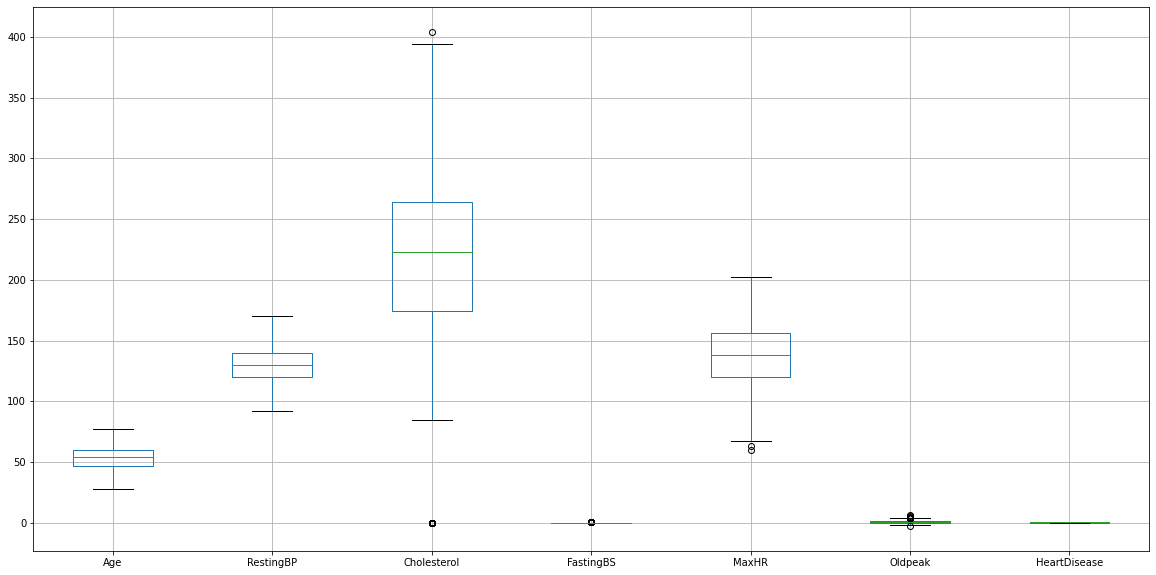

In [1095]:
plt.figure(figsize=(20,10))
df.boxplot()

In [1096]:
df.Sex=df.Sex.map({'M':1,'F':0})
df.ExerciseAngina=df.ExerciseAngina.map({'Y':1,'N':0})

In [1097]:
df.Sex.dtype

dtype('int64')

In [1098]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,131.080698,195.672846,0.233370,136.789531,0.404580,0.886696,0.552890
std,9.437636,0.407864,15.605677,104.200260,0.423206,25.467129,0.491078,1.066960,0.497466
min,28.000000,0.000000,92.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,264.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,170.000000,404.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [1099]:
df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
Age,1.000000,0.055670,0.268709,-0.095081,0.198170,-0.382280,0.216017,0.258563,0.282012
Sex,0.055670,1.000000,0.045207,-0.196153,0.120424,-0.189668,0.191226,0.105444,0.305118
RestingBP,0.268709,0.045207,1.000000,0.094816,0.049215,-0.106553,0.144741,0.182474,0.108152
Cholesterol,-0.095081,-0.196153,0.094816,1.000000,-0.283631,0.249190,-0.028410,0.054570,-0.246202
FastingBS,0.198170,0.120424,0.049215,-0.283631,1.000000,-0.131067,0.059988,0.053062,0.267994
MaxHR,-0.382280,-0.189668,-0.106553,0.249190,-0.131067,1.000000,-0.370023,-0.161213,-0.401410
ExerciseAngina,0.216017,0.191226,0.144741,-0.028410,0.059988,-0.370023,1.000000,0.409494,0.495490
Oldpeak,0.258563,0.105444,0.182474,0.054570,0.053062,-0.161213,0.409494,1.000000,0.403638
HeartDisease,0.282012,0.305118,0.108152,-0.246202,0.267994,-0.401410,0.495490,0.403638,1.000000


<AxesSubplot:>

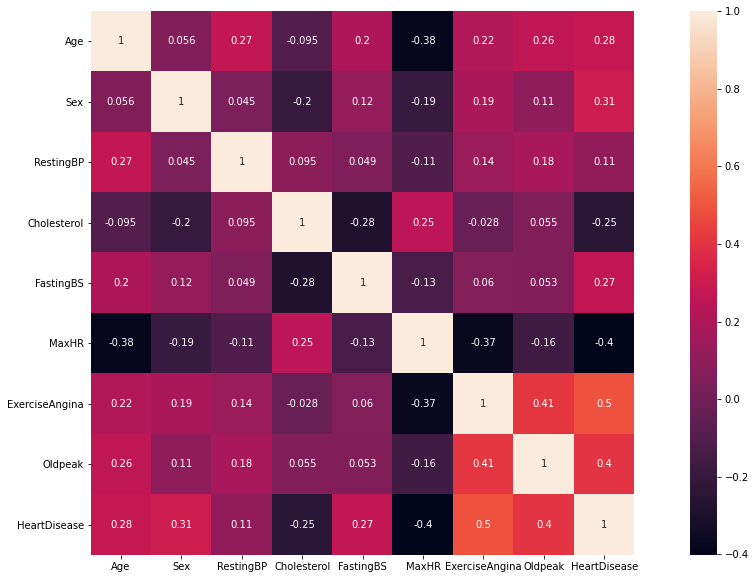

In [1100]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot=True,square=True)

In [1101]:
X=df.drop(['HeartDisease'],axis=1)
y=df['HeartDisease']


In [1102]:
category=X.select_dtypes(include='object').columns
category

Index(['ChestPainType', 'RestingECG', 'ST_Slope'], dtype='object')

In [1103]:
X=pd.get_dummies(X,columns=category,drop_first=True)


In [1104]:
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,1,0,0,1,0,0,1
1,49,0,160.0,180.0,0,156,0,1.0,0,1,0,1,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,1,0,0,0,1,0,1
3,48,0,138.0,214.0,0,108,1,1.5,0,0,0,1,0,1,0
4,54,1,150.0,195.0,0,122,0,0.0,0,1,0,1,0,0,1


In [1105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [1106]:
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,6,10])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))

In [1107]:
X[:5]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0,0.0,1,0,0,1,0,0,1
1,49,0,160.0,180.0,0,156,0,1.0,0,1,0,1,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,1,0,0,0,1,0,1
3,48,0,138.0,214.0,0,108,1,1.5,0,0,0,1,0,1,0
4,54,1,150.0,195.0,0,122,0,0.0,0,1,0,1,0,0,1


In [1108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [1109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1110]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.782608695652174

In [1111]:
sc=StandardScaler()
X_train.iloc[:,[0,2,3,5,7]]=sc.fit_transform(X_train.iloc[:,[0,2,3,5,7]])
X_test.iloc[:,[0,2,3,5,7]]=sc.transform(X_test.iloc[:,[0,2,3,5,7]])

In [1112]:
X_train[0:5]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
795,-1.240174,1,-0.732040,0.403567,1,2.279003,0,-0.093207,0,1,0,1,0,0,0
25,-1.880274,1,-0.088884,0.106555,0,1.648325,0,-0.829816,0,1,0,1,0,0,1
84,0.253391,1,1.197429,0.144879,1,-0.440797,1,0.090946,0,0,0,1,0,1,0
10,-1.773590,0,-0.088884,0.125717,0,0.229298,0,-0.829816,0,1,0,1,0,0,1
344,-0.280025,1,-0.732040,-1.895884,1,-1.268563,0,-0.829816,0,0,0,1,0,1,0


In [1113]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.7934782608695652

In [1114]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8858695652173914

In [1115]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)


0.8858695652173914

In [1057]:
confusion_matrix(y_test,y_pred)

array([[ 59,  13],
       [  8, 104]], dtype=int64)

In [995]:
from sklearn.model_selection import GridSearchCV

In [935]:
np.linspace(0,2,20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [998]:
get_params=[{'C':np.logspace(0,2,20),'kernel':['linear', 'poly','rbf']},
            
]
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = get_params,
                           scoring = 'f1',
                           cv = 10,
                           verbose=0)

In [999]:
grid_search.fit(X_train, y_train)
print("best score: ", grid_search.best_score_)
print("best param: ", grid_search.best_params_)

best score:  0.8802947997569177
best param:  {'C': 1.0, 'kernel': 'rbf'}
